In [1]:
import numpy as np
path = "./ex2data1.txt"

Plotting the data

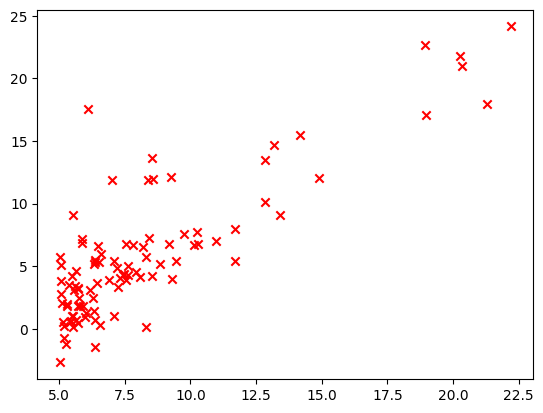

In [2]:
import matplotlib.pyplot as plt

# used for manipulating directory paths
import os

# Read comma separated data
data = np.loadtxt(path, delimiter=',')
X, Y = data[:, 0], data[:, 1]
 
# Plot Data
def plotdata(a,b):                       # function def
  # plotting points as a scatter plot 
    plt.scatter(X,Y, marker = 'x', color  = 'red')
    return
 
plotdata(X,Y)  # function Call
plt.show()

DO NOT run this block more than one time

In [3]:
m = Y.size  # number of training examples
X = np.stack([np.ones(m), X], axis=1) # it used to convert X in to (97x2), first colum is all ones to get  where theta is (2x1)    "theta[0]+theta[1]*X"
print(X.shape)

(97, 2)


Computing cost

In [4]:
import numpy as np
from numpy import *

def computeCost(X,y , theta):
  m = y.size
  J = 0 
  h = np.dot(X, theta)
  for i in range(m):
      J = J + (h[i] - y[i])**2
  J = J/(2*m)     
  return J

J = computeCost(X, Y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed =', J)
print('Expected cost value (approximately) 32.07')

With theta = [0, 0] 
Cost computed = 32.072733877455654
Expected cost value (approximately) 32.07


Gradient Descent

[-3.58838901  1.12366721]


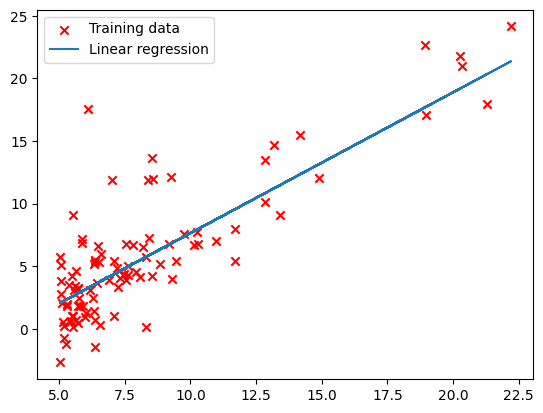

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []
  
  for i in range(num_iters):
      for j in range(m):
          h = np.dot(X, theta)
          theta[0] =  theta[0] - (1/m)*alpha*((h[j] - y[j])*X[j,0])
          theta[1] =  theta[1] - (1/m)*alpha*((h[j] - y[j])*X[j,1])
      J_history.append(computeCost(X, y, theta))  
  return theta, J_history


# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations) 
print(theta)
# plot the linear fit

plt.scatter(X[:, 1],Y, marker = 'x', color = 'red')
plt.plot(X[:, 1], np.dot(X, theta))

plt.legend(['Training data',  'Linear regression'])


Feature Normalization

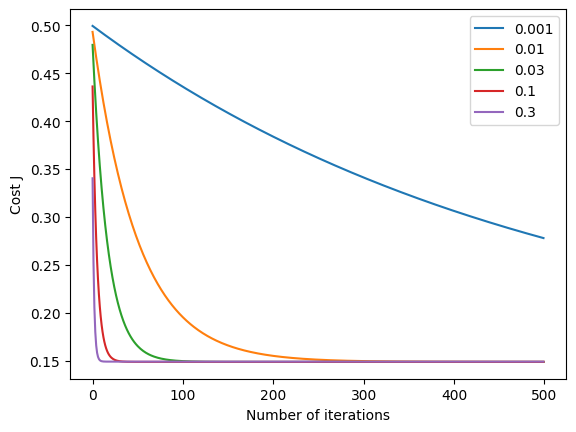

In [9]:
X, Y = data[:, 0], data[:, 1]
def  featureNormalize(X):
    
    mu = np.mean(X)
    sigma = np.std(X)
    X_norm = (X - mu)/sigma
    
    return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
Y, mu, sigma = featureNormalize(Y)

X = np.stack([np.ones(m), X], axis=1)

# some gradient descent settings
iterations = 500
alpha = [0.001, 0.01, 0.03, 0.1, 0.3] #ENTER YOUR LEARNING RATES TO EXPERIMENT WITH
costs=[]

for i in range(len(alpha)):
  theta = np.zeros(2) 
  theta, J_history = gradientDescent(X ,Y, theta, alpha[i], iterations)
  costs.append(J_history)

# Plot the convergence graph
for i in range(len(alpha)):
  plt.plot(np.arange(len(costs[i])), costs[i], label=str(alpha[i]))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()